In [1]:
import os, shutil

src = "/storage/original_dataset"
dst = "/storage/dataset_no_amd"
os.makedirs(dst, exist_ok=True)

for cls in os.listdir(src):
    if cls == "amd":
        continue  # skip amd
    shutil.copytree(os.path.join(src, cls), os.path.join(dst, cls), dirs_exist_ok=True)


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization  ,GlobalAveragePooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


In [7]:
data_dir = "/storage/dataset_no_amd"
img_size = (224, 224)
batch_size = 32
seed = 123

# First split: 85% train+val, 15% test
train_val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'  # Use 'categorical' for multi-class classification
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'  # Use 'categorical' for multi-class classification
)

class_names = train_val_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Now split train_val_ds (85%) into 70/15
train_size = 0.8235  # 70 / 85 = 0.8235

train_ds = train_val_ds.take(int(len(train_val_ds) * train_size))
val_ds = train_val_ds.skip(int(len(train_val_ds) * train_size))


Found 15219 files belonging to 5 classes.
Using 12937 files for training.


2025-10-20 08:13:21.528959: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-20 08:13:21.798143: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-20 08:13:21.798333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 15219 files belonging to 5 classes.
Using 2282 files for validation.
Classes: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'myopia', 'normal']


In [3]:
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

In [4]:
from tensorflow.keras.layers import Activation
from tensorflow.keras import Sequential

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      1

2025-10-19 19:02:18.963435: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-10-19 19:02:20.781139: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-10-19 19:02:23.707595: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fb4f5d2a9f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-10-19 19:02:23.707638: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2025-10-19 19:02:23.723609: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1760900543.839391     135 device_compiler.h:186] Compiled cluster using XLA!  Thi

333/333 [==============================] - 112s 297ms/step - loss: 1.2781 - accuracy: 0.4748 - precision: 0.5950 - recall: 0.2508 - val_loss: 2.3414 - val_accuracy: 0.1000 - val_precision: 0.1574 - val_recall: 0.0298 - lr: 1.0000e-04
Epoch 2/50
333/333 [==============================] - 83s 246ms/step - loss: 1.0405 - accuracy: 0.5662 - precision: 0.6484 - recall: 0.4100 - val_loss: 1.4185 - val_accuracy: 0.4494 - val_precision: 0.6343 - val_recall: 0.2495 - lr: 1.0000e-04
Epoch 3/50
333/333 [==============================] - 82s 243ms/step - loss: 0.9446 - accuracy: 0.6081 - precision: 0.6796 - recall: 0.4738 - val_loss: 0.9113 - val_accuracy: 0.6164 - val_precision: 0.6915 - val_recall: 0.4923 - lr: 1.0000e-04
Epoch 4/50
333/333 [==============================] - 124s 371ms/step - loss: 0.8791 - accuracy: 0.6343 - precision: 0.6964 - recall: 0.5235 - val_loss: 0.8990 - val_accuracy: 0.6335 - val_precision: 0.7032 - val_recall: 0.4809 - lr: 1.0000e-04
Epoch 5/50
333/333 [=============

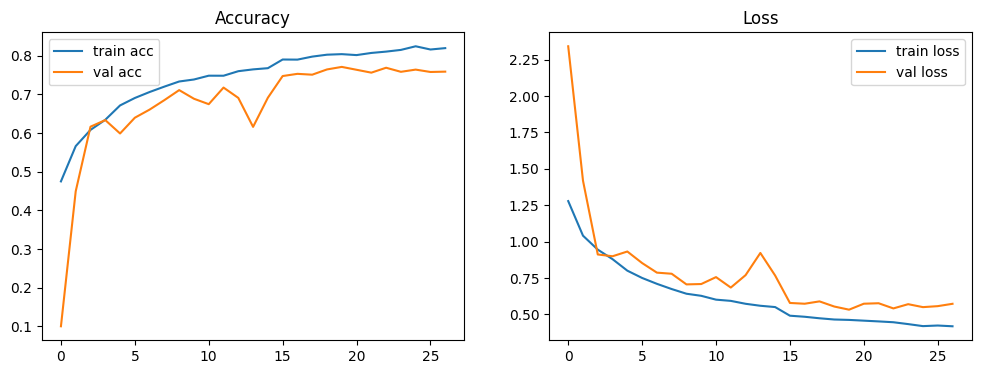

72/72 [==============================] - 13s 163ms/step - loss: 0.4961 - accuracy: 0.7822 - precision: 0.7978 - recall: 0.7677

Test Accuracy: 0.782
Test Precision: 0.798
Test Recall: 0.768


In [ ]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    #Dropout(0.1), 

    Conv2D(64, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(128, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    #Dropout(0.1),

    Conv2D(256, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(512, (3, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    #Dropout(0.1),


    GlobalAveragePooling2D(),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),

    Dense(num_classes, activation='softmax')
])

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=metrics)


model.summary()

epochs = 50

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)]
)


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()


# Evaluate with built-in metrics
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_prec:.3f}")
print(f"Test Recall: {test_rec:.3f}")



In [2]:
from tensorflow.keras.layers import Flatten

2025-10-20 08:12:42.625168: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 08:12:43.099954: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-20 08:12:43.100111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-20 08:12:43.183687: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-20 08:12:43.342689: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_23 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_23 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 112, 112, 64)     

2025-10-19 19:55:35.849833: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


333/333 [==============================] - 92s 258ms/step - loss: 1.1864 - accuracy: 0.5130 - precision: 0.6361 - recall: 0.3117 - val_loss: 2.6258 - val_accuracy: 0.1486 - val_precision: 0.2960 - val_recall: 0.0846 - lr: 1.0000e-04
Epoch 2/50
333/333 [==============================] - 85s 251ms/step - loss: 0.9284 - accuracy: 0.6140 - precision: 0.6887 - recall: 0.4807 - val_loss: 0.9479 - val_accuracy: 0.5892 - val_precision: 0.6516 - val_recall: 0.4862 - lr: 1.0000e-04
Epoch 3/50
333/333 [==============================] - 84s 248ms/step - loss: 0.8329 - accuracy: 0.6492 - precision: 0.7143 - recall: 0.5559 - val_loss: 0.8231 - val_accuracy: 0.6598 - val_precision: 0.6979 - val_recall: 0.5875 - lr: 1.0000e-04
Epoch 4/50
333/333 [==============================] - 83s 247ms/step - loss: 0.7552 - accuracy: 0.6883 - precision: 0.7315 - recall: 0.6065 - val_loss: 0.8182 - val_accuracy: 0.6580 - val_precision: 0.6873 - val_recall: 0.5975 - lr: 1.0000e-04
Epoch 5/50
333/333 [===============

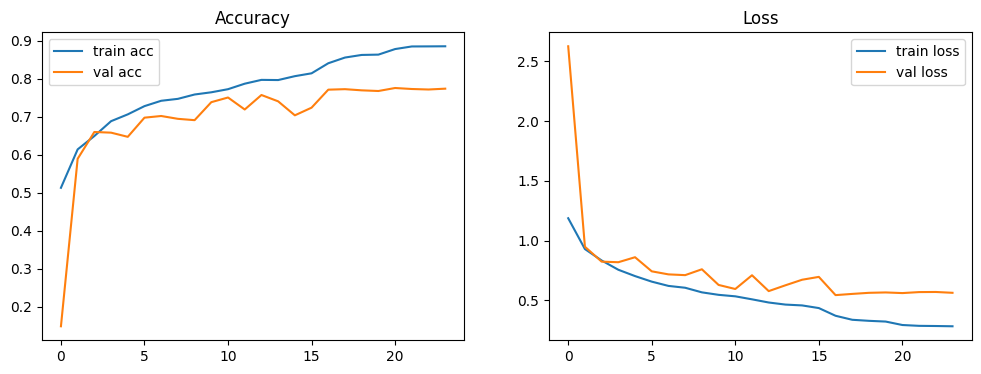

72/72 [==============================] - 15s 182ms/step - loss: 0.5075 - accuracy: 0.7870 - precision: 0.7970 - recall: 0.7691

Test Accuracy: 0.787
Test Precision: 0.797
Test Recall: 0.769


In [13]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    #Dropout(0.1), 

    Conv2D(64, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(128, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    #Dropout(0.1),

    Conv2D(256, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(256, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),


    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),


    Flatten(),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),

    Dense(num_classes, activation='softmax')
])

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=metrics)


model.summary()

epochs = 50

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)]
)


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()


# Evaluate with built-in metrics
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_prec:.3f}")
print(f"Test Recall: {test_rec:.3f}")



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_32 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_32 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 112, 112, 32)     

2025-10-19 20:44:47.688755: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


333/333 [==============================] - 86s 241ms/step - loss: 1.3161 - accuracy: 0.4687 - precision: 0.6119 - recall: 0.2530 - val_loss: 2.8039 - val_accuracy: 0.2591 - val_precision: 0.2694 - val_recall: 0.2074 - lr: 1.0000e-04
Epoch 2/50
333/333 [==============================] - 80s 238ms/step - loss: 0.9947 - accuracy: 0.5872 - precision: 0.6783 - recall: 0.4474 - val_loss: 2.4305 - val_accuracy: 0.2477 - val_precision: 0.2841 - val_recall: 0.2139 - lr: 1.0000e-04
Epoch 3/50
333/333 [==============================] - 82s 245ms/step - loss: 0.8837 - accuracy: 0.6281 - precision: 0.7000 - recall: 0.5186 - val_loss: 1.7649 - val_accuracy: 0.3187 - val_precision: 0.3402 - val_recall: 0.2477 - lr: 1.0000e-04
Epoch 4/50
333/333 [==============================] - 81s 242ms/step - loss: 0.8191 - accuracy: 0.6613 - precision: 0.7132 - recall: 0.5692 - val_loss: 1.4366 - val_accuracy: 0.4472 - val_precision: 0.4798 - val_recall: 0.3547 - lr: 1.0000e-04
Epoch 5/50
333/333 [===============

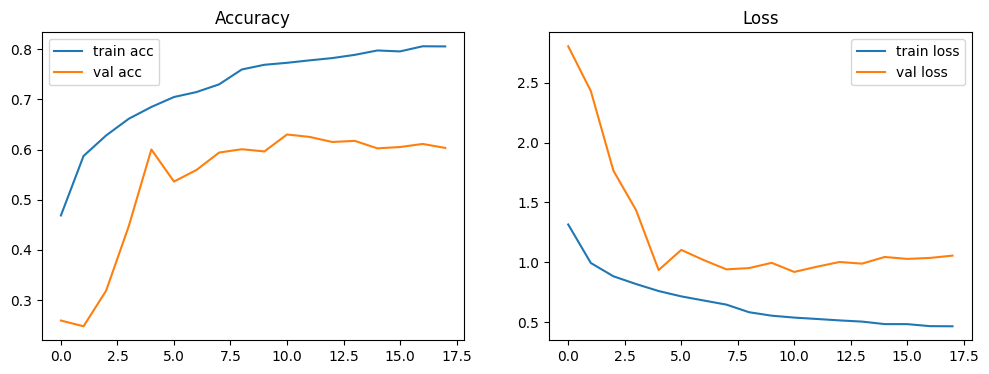

72/72 [==============================] - 13s 161ms/step - loss: 0.8869 - accuracy: 0.6297 - precision: 0.6612 - recall: 0.5977

Test Accuracy: 0.630
Test Precision: 0.661
Test Recall: 0.598


In [14]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1), 

    Conv2D(64, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(128, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(256, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(256, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),


    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),


    Flatten(),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),

    Dense(num_classes, activation='softmax')
])

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=metrics)


model.summary()

epochs = 50

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)]
)


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()


# Evaluate with built-in metrics
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_prec:.3f}")
print(f"Test Recall: {test_rec:.3f}")



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_18 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 64)     

2025-10-20 08:43:58.605122: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


333/333 [==============================] - 79s 223ms/step - loss: 1.1306 - accuracy: 0.5471 - precision: 0.6478 - recall: 0.3909 - val_loss: 4.8156 - val_accuracy: 0.0982 - val_precision: 0.0993 - val_recall: 0.0943 - lr: 1.0000e-04
Epoch 2/50
333/333 [==============================] - 74s 221ms/step - loss: 0.8282 - accuracy: 0.6539 - precision: 0.7123 - recall: 0.5522 - val_loss: 2.2580 - val_accuracy: 0.3463 - val_precision: 0.3646 - val_recall: 0.2986 - lr: 1.0000e-04
Epoch 3/50
333/333 [==============================] - 75s 224ms/step - loss: 0.7164 - accuracy: 0.6958 - precision: 0.7396 - recall: 0.6210 - val_loss: 1.0769 - val_accuracy: 0.5682 - val_precision: 0.6071 - val_recall: 0.5134 - lr: 1.0000e-04
Epoch 4/50
333/333 [==============================] - 77s 230ms/step - loss: 0.6560 - accuracy: 0.7193 - precision: 0.7548 - recall: 0.6649 - val_loss: 0.8136 - val_accuracy: 0.6769 - val_precision: 0.7102 - val_recall: 0.6361 - lr: 1.0000e-04
Epoch 5/50
333/333 [===============

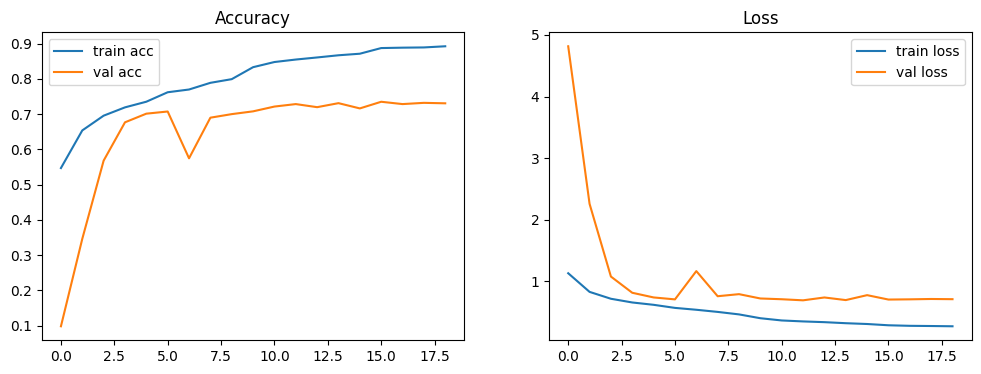

72/72 [==============================] - 12s 154ms/step - loss: 0.6431 - accuracy: 0.7507 - precision: 0.7671 - recall: 0.7331

Test Accuracy: 0.751
Test Precision: 0.767
Test Recall: 0.733


In [10]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    #Dropout(0.1), 

    Conv2D(64, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

    Conv2D(128, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),


    Conv2D(256, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),

    
    Conv2D(512, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),


    Flatten(),

    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(256),
    BatchNormalization(),
    Activation('relu'),

    Dense(num_classes, activation='softmax')
])

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=metrics)


model.summary()

epochs = 50

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)]
)


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()


# Evaluate with built-in metrics
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_prec:.3f}")
print(f"Test Recall: {test_rec:.3f}")


In [11]:
import tensorflow as tf
from tensorflow.keras import layers

# =========================
# 📁 Dataset Configuration
# =========================
data_dir = "/storage/dataset_no_amd"
img_size = (224, 224)
batch_size = 32
seed = 123

# =========================
# 🧩 Split: 85% train+val, 15% test
# =========================
train_val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'  # Multi-class classification
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# =========================
# 🏷️ Classes Info
# =========================
class_names = train_val_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# =========================
# 🔀 Split train_val into train & val (70/15 of total)
# =========================
train_val_count = tf.data.experimental.cardinality(train_val_ds).numpy()
train_size = int(train_val_count * 0.8235)  # 70/85 = 0.8235

train_ds = train_val_ds.take(train_size)
val_ds = train_val_ds.skip(train_size)

# =========================
# 🧠 Data Augmentation
# =========================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),              # Safe for retinal images
    layers.RandomRotation(0.1),                   # ±10%
    layers.RandomZoom(0.1),                       # Slight zoom
    layers.RandomTranslation(0.05, 0.05),         # Small shifts
    layers.RandomBrightness(factor=0.2),          # Illumination variation
    layers.RandomContrast(0.2),                   # Contrast variation
], name="data_augmentation")

# =========================
# ⚙️ Normalization
# =========================
normalization_layer = layers.Rescaling(1./255)

# =========================
# 🚀 Apply Augmentation + Optimization
# =========================
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    train_ds
    .map(lambda x, y: (data_augmentation(x, training=True), y),
         num_parallel_calls=AUTOTUNE)
    .map(lambda x, y: (normalization_layer(x), y),
         num_parallel_calls=AUTOTUNE)
    .cache()
    .shuffle(1000)
    .prefetch(buffer_size=AUTOTUNE)
)

val_ds = (
    val_ds
    .map(lambda x, y: (normalization_layer(x), y),
         num_parallel_calls=AUTOTUNE)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

test_ds = (
    test_ds
    .map(lambda x, y: (normalization_layer(x), y),
         num_parallel_calls=AUTOTUNE)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

# =========================
# ✅ Final Checks
# =========================
print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test batches:", tf.data.experimental.cardinality(test_ds).numpy())

# Example model input shape
example_batch = next(iter(train_ds))[0]
print("Example batch shape:", example_batch.shape)


Found 15219 files belonging to 5 classes.
Using 12937 files for training.
Found 15219 files belonging to 5 classes.
Using 2282 files for validation.
Classes: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'myopia', 'normal']
Train batches: 333
Validation batches: 72
Test batches: 72


2025-10-20 10:09:57.391717: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:42: Filling up shuffle buffer (this may take a while): 44 of 1000
2025-10-20 10:10:17.357842: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:42: Filling up shuffle buffer (this may take a while): 165 of 1000
2025-10-20 10:10:37.382994: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:42: Filling up shuffle buffer (this may take a while): 283 of 1000


Example batch shape: (32, 224, 224, 3)


2025-10-20 10:10:46.310295: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_53 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_70 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_70 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_49 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 flatten_11 (Flatten)        (None, 401408)          

2025-10-20 11:15:45.343316: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_11/dropout_49/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


333/333 [==============================] - 14s 37ms/step - loss: 1.7285 - accuracy: 0.2856 - precision: 0.3562 - recall: 0.0994 - val_loss: 1.4327 - val_accuracy: 0.4599 - val_precision: 1.0000 - val_recall: 8.7681e-04 - lr: 1.0000e-04
Epoch 2/150
333/333 [==============================] - 12s 37ms/step - loss: 1.4368 - accuracy: 0.4032 - precision: 0.5252 - recall: 0.1694 - val_loss: 1.2256 - val_accuracy: 0.5042 - val_precision: 0.6767 - val_recall: 0.1964 - lr: 1.0000e-04
Epoch 3/150
333/333 [==============================] - 12s 37ms/step - loss: 1.2982 - accuracy: 0.4650 - precision: 0.5966 - recall: 0.2271 - val_loss: 1.1910 - val_accuracy: 0.5151 - val_precision: 0.6103 - val_recall: 0.3214 - lr: 1.0000e-04
Epoch 4/150
333/333 [==============================] - 12s 37ms/step - loss: 1.2219 - accuracy: 0.4895 - precision: 0.6222 - recall: 0.2638 - val_loss: 1.1423 - val_accuracy: 0.5292 - val_precision: 0.6377 - val_recall: 0.3512 - lr: 1.0000e-04
Epoch 5/150
333/333 [===========

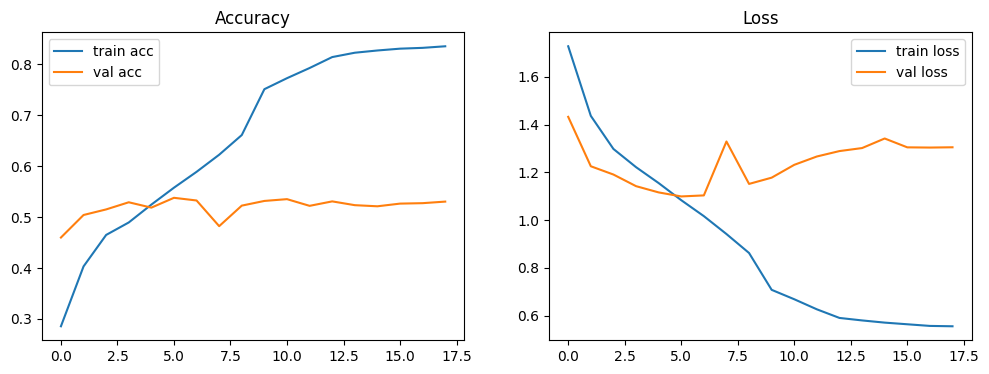

72/72 [==============================] - 1s 9ms/step - loss: 1.0692 - accuracy: 0.5587 - precision: 0.6279 - recall: 0.3979

Test Accuracy: 0.559
Test Precision: 0.628
Test Recall: 0.398
1/1 [==============================] - 0s 74ms/step


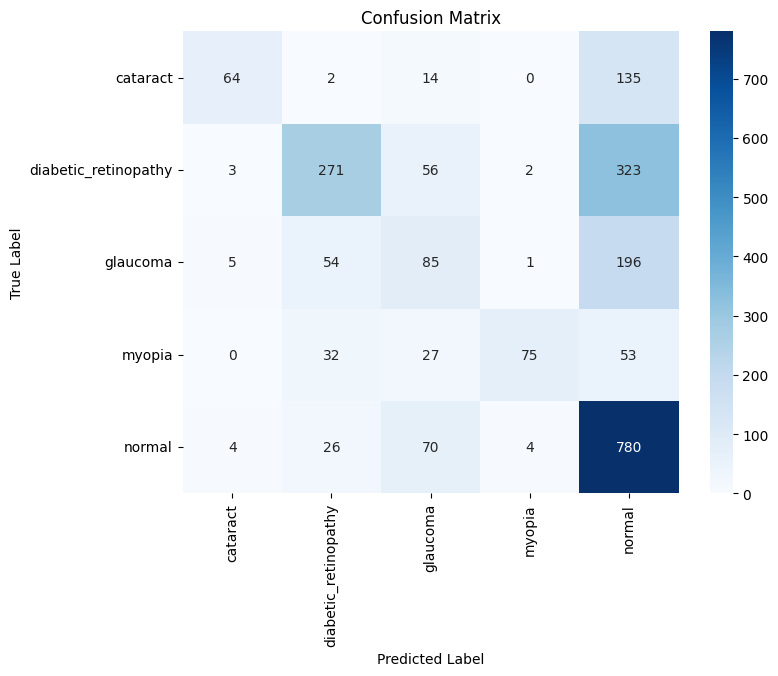


Classification Report:

                      precision    recall  f1-score   support

            cataract       0.84      0.30      0.44       215
diabetic_retinopathy       0.70      0.41      0.52       655
            glaucoma       0.34      0.25      0.29       341
              myopia       0.91      0.40      0.56       187
              normal       0.52      0.88      0.66       884

            accuracy                           0.56      2282
           macro avg       0.66      0.45      0.49      2282
        weighted avg       0.61      0.56      0.53      2282



In [21]:
# =========================
# 🧠 Model Definition
# =========================
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.1),

   

    

   


    Flatten(),
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),


    Dense(num_classes, activation='softmax')
])

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=metrics)

model.summary()

# =========================
# 🏋️ Training
# =========================
epochs = 150
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
    ]
)

# =========================
# 📈 Plot Accuracy & Loss
# =========================
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()

# =========================
# 🧪 Evaluate on Test Set
# =========================
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)
print(f"\nTest Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_prec:.3f}")
print(f"Test Recall: {test_rec:.3f}")

# =========================
# 🧩 Confusion Matrix & Classification Report
# =========================
y_true, y_pred = [], []
for x, y in test_ds:
    preds = model.predict(x)
    y_true.extend(tf.argmax(y, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 15219 files belonging to 5 classes.
Using 12937 files for training.
Found 15219 files belonging to 5 classes.
Using 2282 files for validation.
Classes: ['cataract', 'diabetic_retinopathy', 'glaucoma', 'myopia', 'normal']
Train batches: 333
Val batches: 72
Test batches: 72
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_72 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_72 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                

2025-10-20 11:23:31.371927: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_12/dropout_51/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2025-10-20 11:23:41.610816: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9162: Filling up shuffle buffer (this may take a while): 58 of 1000
2025-10-20 11:24:01.678268: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:9162: Filling up shuffle buffer (this may take a while): 194 of 1000
2025-10-20 11:24:21.537203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


333/333 [==============================] - 138s 256ms/step - loss: 1.4984 - accuracy: 0.4044 - precision: 0.4878 - recall: 0.2142 - val_loss: 1.6089 - val_accuracy: 0.2648 - val_precision: 0.2966 - val_recall: 0.1960 - lr: 1.0000e-04
Epoch 2/100
333/333 [==============================] - 26s 76ms/step - loss: 1.2624 - accuracy: 0.4811 - precision: 0.5584 - recall: 0.3067 - val_loss: 1.2629 - val_accuracy: 0.4888 - val_precision: 0.6156 - val_recall: 0.2801 - lr: 1.0000e-04
Epoch 3/100
333/333 [==============================] - 25s 73ms/step - loss: 1.1896 - accuracy: 0.5015 - precision: 0.5787 - recall: 0.3463 - val_loss: 1.3678 - val_accuracy: 0.4708 - val_precision: 0.5180 - val_recall: 0.3911 - lr: 1.0000e-04
Epoch 4/100
333/333 [==============================] - 25s 74ms/step - loss: 1.1407 - accuracy: 0.5205 - precision: 0.5965 - recall: 0.3672 - val_loss: 1.1990 - val_accuracy: 0.5138 - val_precision: 0.5628 - val_recall: 0.4402 - lr: 1.0000e-04
Epoch 5/100
333/333 [=============

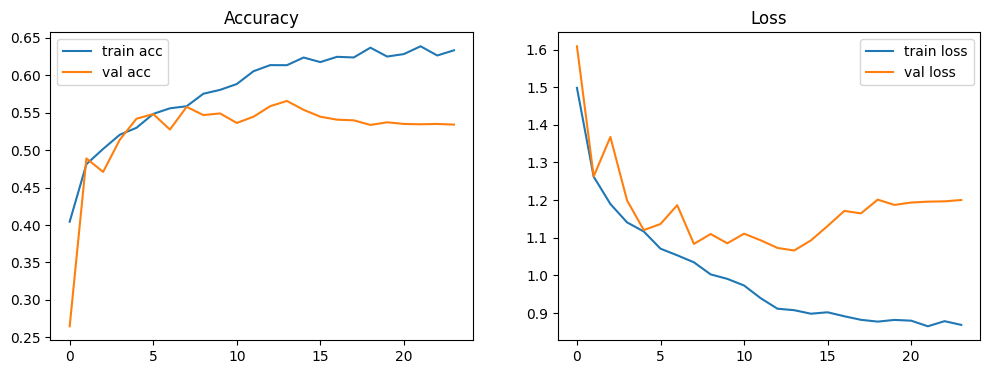

72/72 [==============================] - 13s 160ms/step - loss: 1.0332 - accuracy: 0.5833 - precision: 0.6259 - recall: 0.5359

✅ Test Accuracy: 0.583
✅ Test Precision: 0.626
✅ Test Recall: 0.536
1/1 [==============================] - 0s 29ms/step


2025-10-20 11:36:43.739327: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 19267584 bytes after encountering the first element of size 19267584 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 [==============================] - 0s 95ms/step


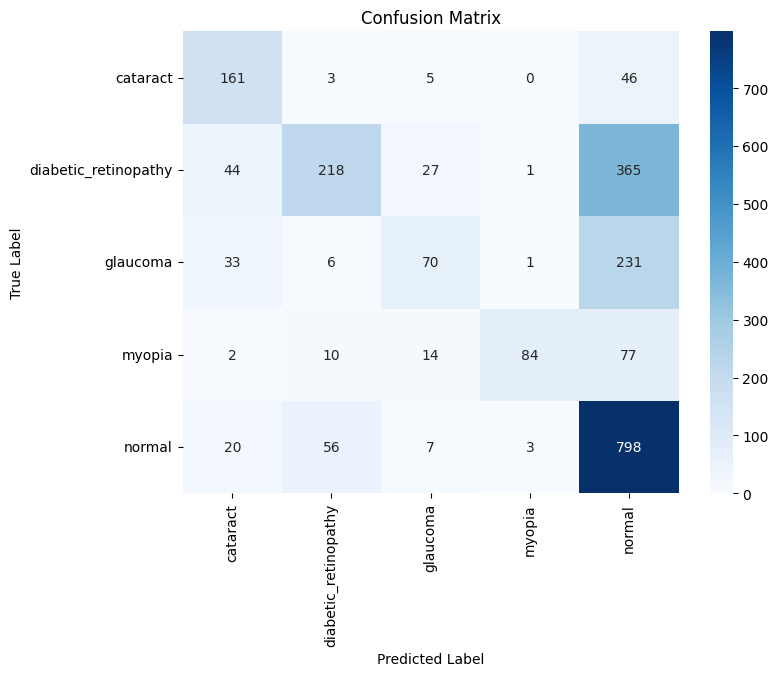


Classification Report:

                      precision    recall  f1-score   support

            cataract       0.62      0.75      0.68       215
diabetic_retinopathy       0.74      0.33      0.46       655
            glaucoma       0.57      0.21      0.30       341
              myopia       0.94      0.45      0.61       187
              normal       0.53      0.90      0.66       884

            accuracy                           0.58      2282
           macro avg       0.68      0.53      0.54      2282
        weighted avg       0.64      0.58      0.55      2282



In [22]:
# ==========================================
# 📦 IMPORTS
# ==========================================
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 📁 DATASET CONFIGURATION
# ==========================================
data_dir = "/storage/dataset_no_amd"
img_size = (224, 224)
batch_size = 32
seed = 123

# ✅ Split into train+val (85%) and test (15%)
train_val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# ✅ Class info
class_names = train_val_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# ==========================================
# 🔀 Split train_val into train & val
# ==========================================
train_val_count = tf.data.experimental.cardinality(train_val_ds).numpy()
train_size = int(train_val_count * 0.8235)  # (70%/85%) = 0.8235

train_ds = train_val_ds.take(train_size)
val_ds = train_val_ds.skip(train_size)

# ==========================================
# 🧩 DATA AUGMENTATION
# ==========================================
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.05, 0.05),
    layers.RandomBrightness(factor=0.2),
    layers.RandomContrast(0.2),
], name="data_augmentation")

# ==========================================
# ⚙️ NORMALIZATION
# ==========================================
normalization_layer = layers.Rescaling(1./255)
AUTOTUNE = tf.data.AUTOTUNE

# ==========================================
# 🧠 APPLY AUGMENTATION + PIPELINE FIX
# ==========================================
train_ds = (
    train_ds
    .cache()  # cache raw images, not augmented
    .shuffle(1000)
    .map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    .map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
    .prefetch(buffer_size=AUTOTUNE)
)

val_ds = (
    val_ds
    .cache()
    .map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
    .prefetch(buffer_size=AUTOTUNE)
)

test_ds = (
    test_ds
    .cache()
    .map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
    .prefetch(buffer_size=AUTOTUNE)
)

# ==========================================
# ✅ FINAL CHECKS
# ==========================================
print("Train batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Val batches:", tf.data.experimental.cardinality(val_ds).numpy())
print("Test batches:", tf.data.experimental.cardinality(test_ds).numpy())

# ==========================================
# 🧱 MODEL DEFINITION (DEEPER CNN)
# ==========================================
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=metrics)

model.summary()

# ==========================================
# 🏋️ TRAINING
# ==========================================
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
    ]
)

# ==========================================
# 📈 PLOT ACCURACY & LOSS
# ==========================================
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# ==========================================
# 🧪 EVALUATION ON TEST SET
# ==========================================
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.3f}")
print(f"✅ Test Precision: {test_prec:.3f}")
print(f"✅ Test Recall: {test_rec:.3f}")

# ==========================================
# 🧩 CONFUSION MATRIX + REPORT
# ==========================================
y_true, y_pred = [], []
for x, y in test_ds:
    preds = model.predict(x)
    y_true.extend(tf.argmax(y, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_76 (Ba  (None, 224, 224, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_76 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_57 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_55 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_58 (Conv2D)          (None, 112, 112, 64)    

2025-10-20 11:43:38.695026: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_13/dropout_55/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


333/333 [==============================] - 31s 80ms/step - loss: 1.5136 - accuracy: 0.3922 - precision: 0.4470 - recall: 0.2092 - val_loss: 1.4877 - val_accuracy: 0.3200 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/100
333/333 [==============================] - 26s 76ms/step - loss: 1.3525 - accuracy: 0.4394 - precision: 0.5009 - recall: 0.2816 - val_loss: 1.3568 - val_accuracy: 0.3985 - val_precision: 0.5529 - val_recall: 0.2017 - lr: 1.0000e-04
Epoch 3/100
333/333 [==============================] - 27s 78ms/step - loss: 1.2759 - accuracy: 0.4609 - precision: 0.5310 - recall: 0.3072 - val_loss: 1.5174 - val_accuracy: 0.3516 - val_precision: 0.4150 - val_recall: 0.2087 - lr: 1.0000e-04
Epoch 4/100
333/333 [==============================] - 26s 78ms/step - loss: 1.2243 - accuracy: 0.4876 - precision: 0.5558 - recall: 0.3303 - val_loss: 1.3258 - val_accuracy: 0.4419 - val_precision: 0.5177 - val_recall: 0.3275 - lr: 1.0000e-04
Epoch 5/100
333/333 [=======

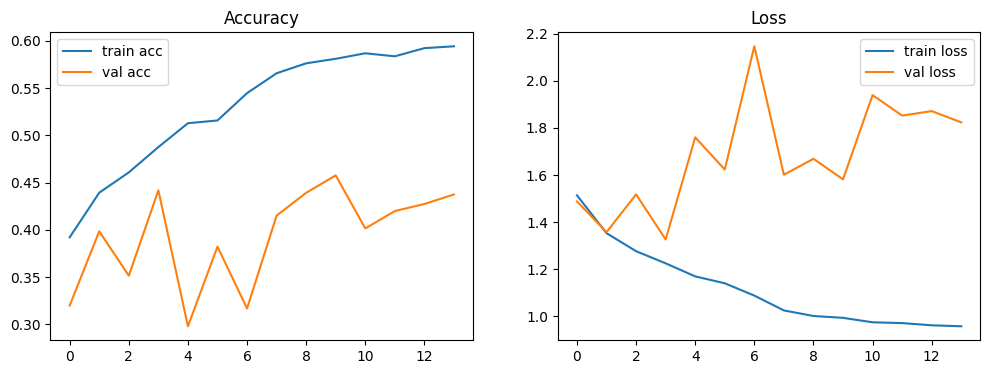

72/72 [==============================] - 1s 15ms/step - loss: 1.2844 - accuracy: 0.4500 - precision: 0.5338 - recall: 0.3422

✅ Test Accuracy: 0.450
✅ Test Precision: 0.534
✅ Test Recall: 0.342
1/1 [==============================] - 0s 140ms/step


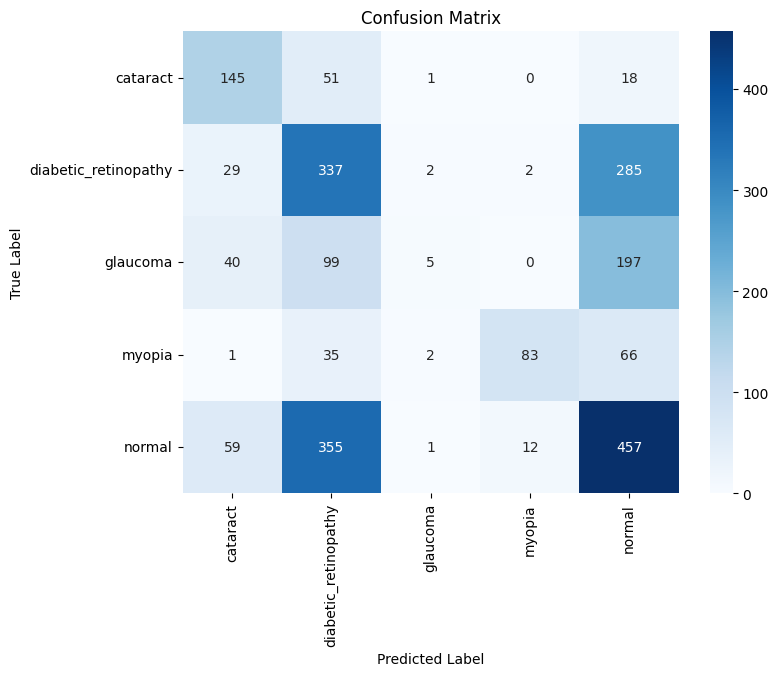


Classification Report:

                      precision    recall  f1-score   support

            cataract       0.53      0.67      0.59       215
diabetic_retinopathy       0.38      0.51      0.44       655
            glaucoma       0.45      0.01      0.03       341
              myopia       0.86      0.44      0.58       187
              normal       0.45      0.52      0.48       884

            accuracy                           0.45      2282
           macro avg       0.53      0.43      0.43      2282
        weighted avg       0.47      0.45      0.42      2282



In [23]:
# ==========================================
# 🧱 MODEL DEFINITION (DEEPER CNN)
# ==========================================
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.15),

    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(256, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),


    Conv2D(512, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Flatten(),

    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),


    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=metrics)

model.summary()

# ==========================================
# 🏋️ TRAINING
# ==========================================
epochs = 100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
    ]
)

# ==========================================
# 📈 PLOT ACCURACY & LOSS
# ==========================================
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# ==========================================
# 🧪 EVALUATION ON TEST SET
# ==========================================
test_loss, test_acc, test_prec, test_rec = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.3f}")
print(f"✅ Test Precision: {test_prec:.3f}")
print(f"✅ Test Recall: {test_rec:.3f}")

# ==========================================
# 🧩 CONFUSION MATRIX + REPORT
# ==========================================
y_true, y_pred = [], []
for x, y in test_ds:
    preds = model.predict(x)
    y_true.extend(tf.argmax(y, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
